# Plot person centrality

In [1]:
import os
import json
import pickle
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join("..", "..", "data", "person_level_degrees", "raw_degrees")
income_wise_degrees = defaultdict(lambda: defaultdict(list))

In [3]:
for pickle_file in os.listdir(data_dir):
    with open(os.path.join(data_dir, pickle_file), 'rb') as f:
        name_elems = pickle_file.split(".")[0].split("_")
        income_class = name_elems[0]
        degree_type = name_elems[-1]
        income_wise_degrees[degree_type][income_class] = pickle.load(f)

In [4]:
income_wise_degrees.keys()

dict_keys(['indegrees', 'outdegrees'])

In [5]:
income_wise_degrees['indegrees'].keys()

dict_keys(['upper-middle', 'low', 'lower-middle', 'high'])

In [6]:
for l in income_wise_degrees['indegrees'].values():
    print(len(l))

574448
35315
221494
3290471


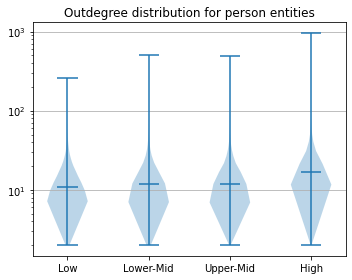

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

income_classes = ["low", "lower-middle", "upper-middle", "high"]
all_data = [income_wise_degrees['outdegrees'][i] for i in income_classes]


# plot box plot
axs.violinplot(all_data, showmedians=True)
axs.set_title('Outdegree distribution for person entities')

plt.yscale('log')

# adding horizontal grid lines
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(all_data))],
                labels=["Low", "Lower-Mid", "Upper-Mid", "High"])

plt.tight_layout()
plt.savefig(os.path.join("..", "..", "data", "plots", "person_outdregees_violinplot.png"), dpi=300)